In [1]:
#Para usar bases de datos
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt



In [3]:
#Para usar la Red neuronal
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout

In [4]:
data = pd.read_csv('data.csv')
#Borramos las columnas que no nos interesan
data=data.drop(['Unnamed: 32'], axis=1)
data=data.drop(['id'], axis=1)
#Obtenemos el nombre de todas las columnas
columns_values = data.columns.values.tolist()
#Cambiamos los valores maliciosos a 1 y los buenos a 0
data.loc[data.diagnosis == 'M', 'diagnosis'] = 1
data.loc[data.diagnosis == 'B', 'diagnosis'] = 0
#Cambiamos los valores de las columnas a int
data.diagnosis = data.diagnosis.astype(int)
data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


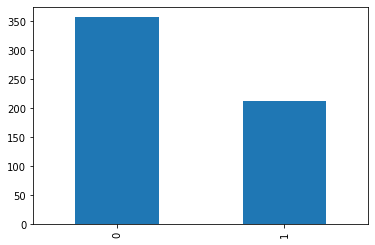

In [5]:
#Contamos los valores de cada columna
data.diagnosis.value_counts()
graph = data.diagnosis.value_counts().plot(kind='bar')
plt.show()
#Como hay pocos datos maliciosos y muchos benignos, habrá un sesgo de datos que 
# provocará que el acurracy nos de info inexacta, para
#esto sirve el f1_score



In [6]:
#Librería para dividir los datos
from sklearn.model_selection import train_test_split
Y=data.diagnosis
X=data.drop(['diagnosis'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
X_train.shape

(455, 30)

In [45]:
n0=30
n1=30
n2=10
n3=1

#Creamos la red neuronal
model = Sequential()
model.add(Dense(n1, activation='relu', input_dim=n0))
#dropout significa que se cortan las conexiones aleatoriamente
model.add(Dropout(0.3))
model.add(Dense(n2, activation='sigmoid'))
model.add(Dropout(0.5))
#En la capa de salida usamos sigmoide para que nos devuelva un valor entre 0 y 1
model.add(Dense(n3, activation='sigmoid'))



Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_12 (Dense)             (None, 30)                930       
_________________________________________________________________
dropout_8 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_13 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_9 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 11        
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


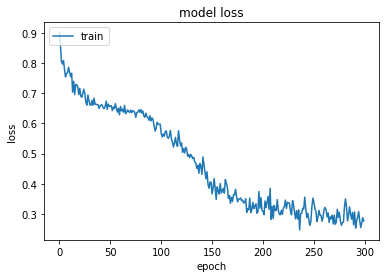

In [46]:

#Compilamos la red
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Entrenamos la red
model.fit(X_train, Y_train, epochs=300, batch_size=10, verbose=0)
model.summary()
#Graficamos el error
plt.plot(model.history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

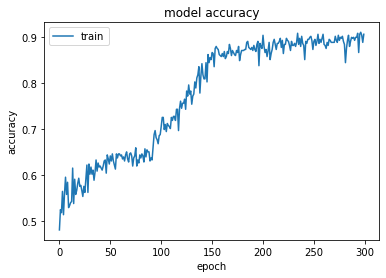

In [47]:
#Graficamos el accuracy
plt.plot(model.history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()
#Evaluamos la red con los datos de test 
#model.evaluate(X_test, Y_test)


In [48]:
#Vemos qué tan bueno es el modelo haciendo round a los valores predichos
predictions = model.predict(X_test)
predictions = predictions.round()
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.89      1.00      0.94        71
           1       1.00      0.79      0.88        43

    accuracy                           0.92       114
   macro avg       0.94      0.90      0.91       114
weighted avg       0.93      0.92      0.92       114



In [9]:
#Matriz de confusion
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y_test, predictions)
print(cm)

[[71  0]
 [ 9 34]]


In [10]:
#F1 score
from sklearn.metrics import f1_score
f1_score(Y_test, predictions)


0.8831168831168831

A partir de aquí haremos otra versión donde los datos estarán más equilibrados, teniendo una cantidad parecida de benignos que malignos y veremos cómo el f1_score mejora

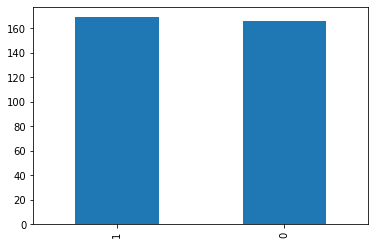

(335,)

In [41]:
#Hacemos el train test split
Y=data.diagnosis
X=data.drop(['diagnosis'], axis=1)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

#Hacemos otro modelo donde tratamos los datos quitando al azar datos benignos
#Dividimos los datos en benignos y maliciosos
YB_train = Y_train[Y_train.values == 0]
YM_train = Y_train[Y_train.values == 1]
XB_train = X_train[Y_train.values == 0]
XM_train = X_train[Y_train.values == 1]

#Eliminamos una cantidad de datos aleatorios para que no haya sesgo
X_limpB = XB_train.sample(frac=0.58, random_state=1)
Y_limpB = YB_train.sample(frac=0.58, random_state=1)
#Unimos los datos
X_train1 = pd.concat([X_limpB, XM_train])
Y_train1= pd.concat([Y_limpB, YM_train])
#Contamos los valores de cada columna para ver si se ha hecho bien
graph = Y_train1.value_counts().plot(kind='bar')
plt.show()
#Revolvemos los datos
X_train1 = X_train1.sample(frac=1, random_state=1)
Y_train1 = Y_train1.sample(frac=1, random_state=1)



Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_9 (Dense)              (None, 30)                930       
_________________________________________________________________
dropout_6 (Dropout)          (None, 30)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)                310       
_________________________________________________________________
dropout_7 (Dropout)          (None, 10)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 1)                 11        
Total params: 1,251
Trainable params: 1,251
Non-trainable params: 0
_________________________________________________________________


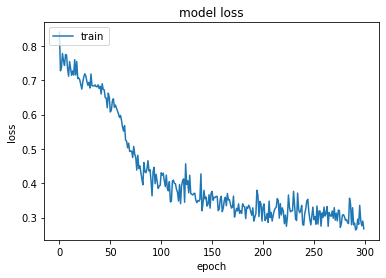

In [42]:
#Hacemos exactamente la misma red que antes
n0=30
n1=30
n2=10
n3=1

#Creamos la red neuronal
model = Sequential()
model.add(Dense(n1, activation='relu', input_dim=n0))
#dropout significa que se cortan las conexiones aleatoriamente
model.add(Dropout(0.3))
model.add(Dense(n2, activation='sigmoid'))
model.add(Dropout(0.5))
#En la capa de salida usamos sigmoide para que nos devuelva un valor entre 0 y 1
model.add(Dense(n3, activation='sigmoid'))


#Compilamos la red
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
#Entrenamos la red
model.fit(X_train1, Y_train1, epochs=300, batch_size=10, verbose=0)
model.summary()
#Graficamos el error
plt.plot(model.history.history['loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


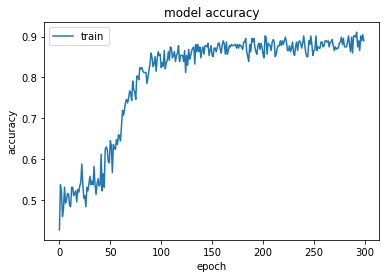

In [43]:
#Graficamos el accuracy
plt.plot(model.history.history['accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()


In [44]:
#Vemos qué tan bueno es el modelo haciendo round a los valores predichos
predictions = model.predict(X_test)
predictions = predictions.round()
from sklearn.metrics import classification_report
print(classification_report(Y_test, predictions))

              precision    recall  f1-score   support

           0       0.96      0.99      0.97        71
           1       0.98      0.93      0.95        43

    accuracy                           0.96       114
   macro avg       0.97      0.96      0.96       114
weighted avg       0.97      0.96      0.96       114



Efectivamente el modelo ha mejorado, pues el X_test no cambió su tamaño y sin embargo el f1 score ha aumentado